In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data_train=pd.read_csv(r'C:\Users\Vincent\Desktop\Housing Price dataset\train.csv')
data_test=pd.read_csv(r'C:\Users\Vincent\Desktop\Housing Price dataset\test.csv')

In [3]:
data_train.shape

(1460, 81)

In [4]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
print('The highest SalePrice is {}.'.format(data_train.SalePrice.max()))

The highest SalePrice is 755000.


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

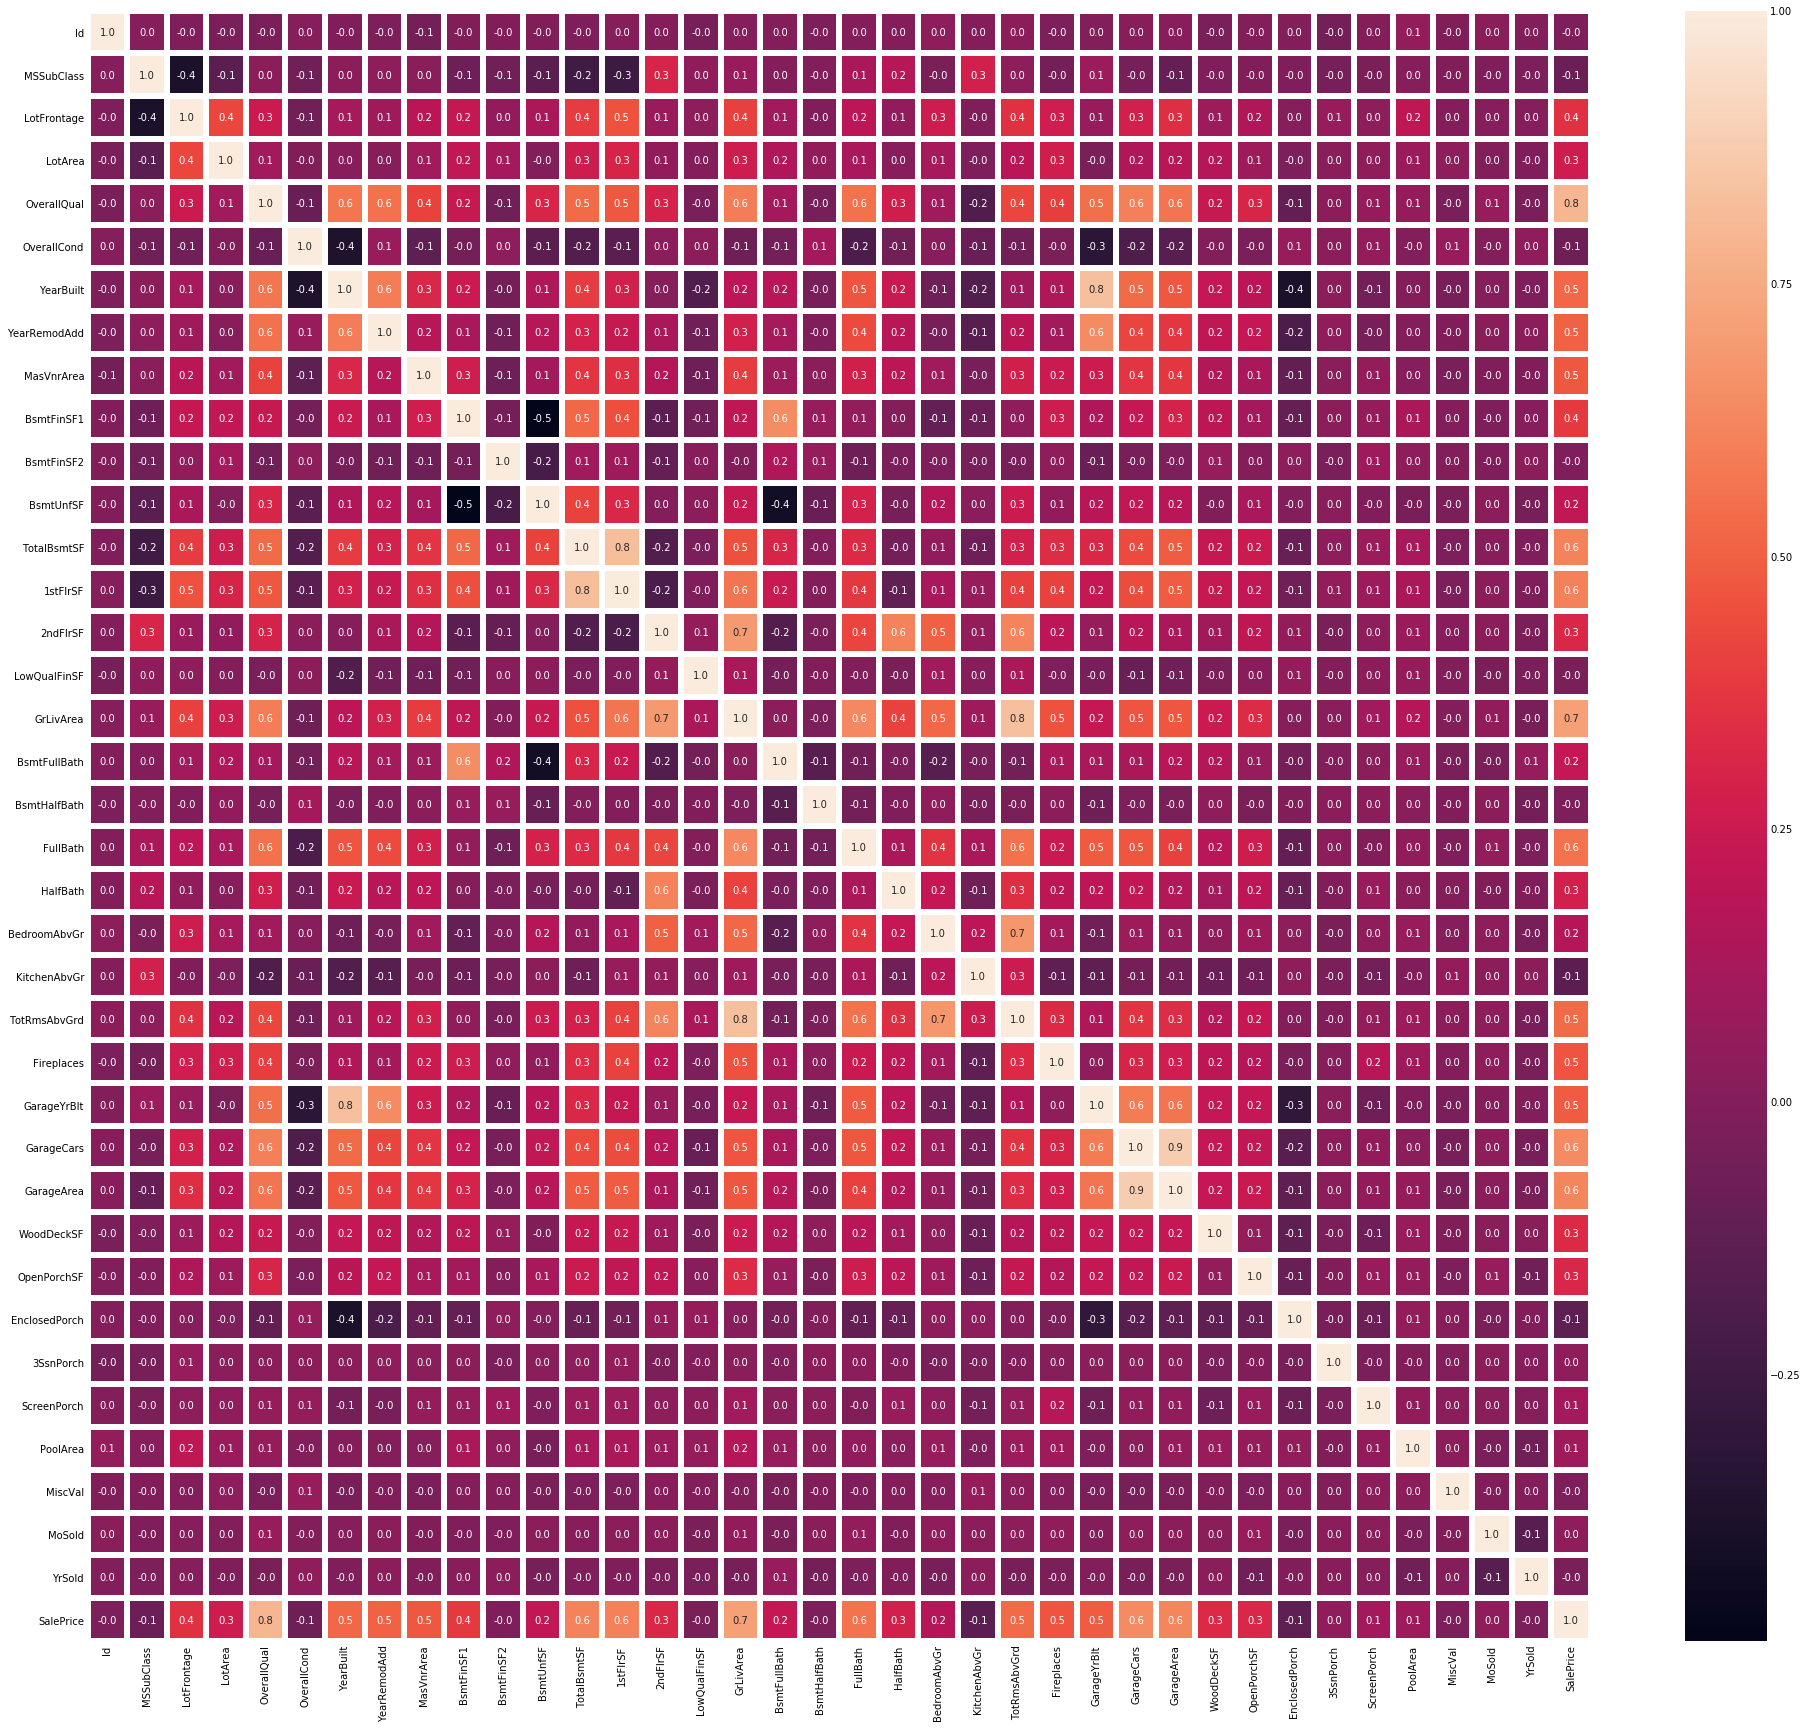

In [8]:
fig,ax=plt.subplots(figsize=(30,30))
sns.heatmap(data_train.corr(),annot=True,linewidth=5,fmt='.1f',ax=ax) 

In [9]:
#take out the duplicate features
#1.we can see TotalBsmtSF and 1stFlrSF are highly corrected --> maybe because they usually have the same size
#2.'GarageCars', 'GarageArea' are strongly corrected
#in my model, i wouldn't drop any features unless they are really harmful to the model. 
#e.g. highly corrected, many missing values

#let me drop TotalMsmtSF and GarageCars because their correlation to SalePrice is lower than their related feature
#same--> randomly drop TotalMsmtSF ,GarageCars

#Id doesn't include any info -->exclude
data=data_train.append(data_test)
data.drop(['TotalBsmtSF','GarageCars','Id'],inplace=True,axis=1)

In [10]:
data.shape

(2919, 78)

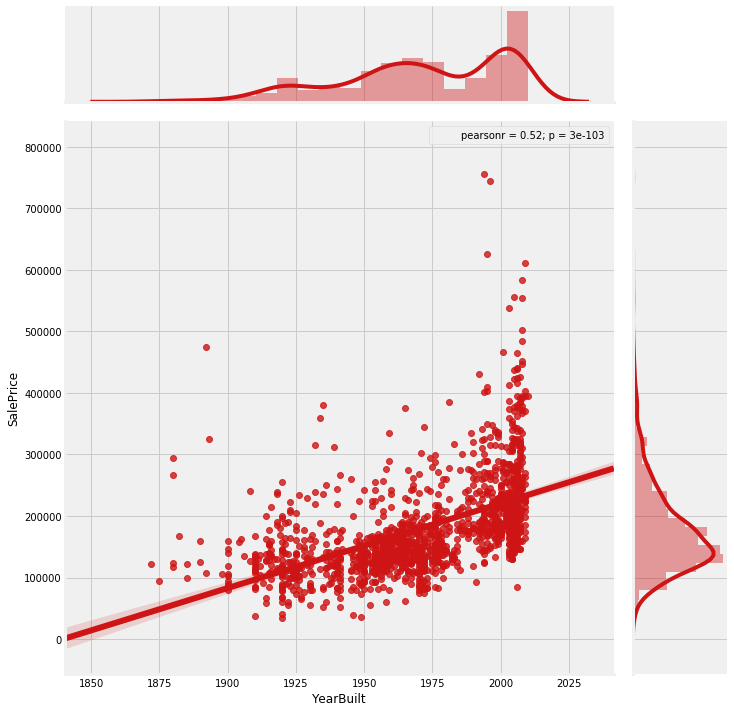

In [11]:
#Here we check for any outliners
sns.jointplot('YearBuilt','SalePrice',data=data,color='#ce1414',size=10,kind='reg') # color=#ce1414=red 

In [12]:
#drop outliners
data[data['SalePrice']>400000]['SalePrice'].index

Int64Index([  58,  161,  178,  185,  231,  278,  349,  389,  440,  473,  496,
             515,  527,  591,  661,  664,  691,  769,  798,  803,  898, 1046,
            1142, 1169, 1182, 1243, 1353, 1373],
           dtype='int64')

In [13]:
#i drop 28 rows
data=data.drop(data.index[[58,  161,  178,  185,  231,  278,  349,  389,  440,  473,  496,
             515,  527,  591,  661,  664,  691,  769,  798,  803,  898, 1046,
            1142, 1169, 1182, 1243, 1353, 1373]])

In [14]:
data[58:70]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
59,780,0,0,NaN,2,1Fam,TA,Av,632.0,0.0,...,124900.0,WD,0,Pave,4,AllPub,196,1972,1972,2008
60,1158,0,0,NaN,3,1Fam,TA,No,941.0,0.0,...,158000.0,New,0,Pave,5,AllPub,0,2004,2004,2006
61,581,530,0,NaN,3,1Fam,Fa,No,0.0,0.0,...,101000.0,WD,0,Pave,6,AllPub,0,1920,1996,2007
62,1370,0,0,NaN,2,TwnhsE,Gd,Mn,24.0,0.0,...,202500.0,WD,0,Pave,6,AllPub,120,2006,2006,2007
63,902,808,0,NaN,3,1Fam,TA,No,0.0,0.0,...,140000.0,WD,0,Pave,9,AllPub,12,1921,1950,2010
64,1057,977,0,NaN,3,1Fam,TA,No,739.0,0.0,...,219500.0,WD,0,Pave,8,AllPub,576,1997,1998,2009
65,1143,1330,0,NaN,4,1Fam,TA,Av,0.0,0.0,...,317000.0,WD,0,Pave,9,AllPub,192,2004,2005,2007
66,2207,0,0,NaN,3,1Fam,TA,Gd,912.0,0.0,...,180000.0,WD,0,Pave,7,AllPub,301,1970,1989,2010
67,1479,0,0,NaN,3,1Fam,TA,Av,1013.0,0.0,...,226000.0,WD,0,Pave,7,AllPub,144,2003,2003,2007
68,747,0,0,NaN,2,1Fam,TA,No,0.0,0.0,...,80000.0,WD,0,Pave,4,AllPub,0,1945,1950,2010


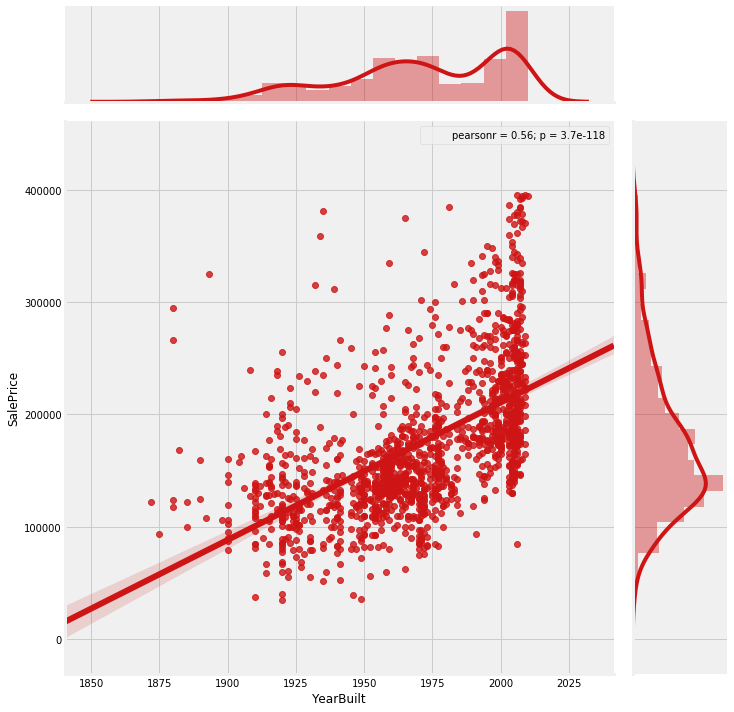

In [15]:
#now we run a jointplot again
sns.jointplot('YearBuilt','SalePrice',data=data,color='#ce1414',size=10,kind='reg')

#select features with missing values
data.isnull().any()
MissingFeatures=pd.DataFrame(data=data.isnull().any(), columns=['Missing'])
MissingFeatures[MissingFeatures['Missing']==True]

In [16]:
data['BsmtFullBath'].value_counts()
# most common value is Sbrkr

0.0    1680
1.0    1141
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [17]:
data.isnull().any()

1stFlrSF         False
2ndFlrSF         False
3SsnPorch        False
Alley             True
BedroomAbvGr     False
BldgType         False
BsmtCond          True
BsmtExposure      True
BsmtFinSF1        True
BsmtFinSF2        True
BsmtFinType1      True
BsmtFinType2      True
BsmtFullBath      True
BsmtHalfBath      True
BsmtQual          True
BsmtUnfSF         True
CentralAir       False
Condition1       False
Condition2       False
Electrical        True
EnclosedPorch    False
ExterCond        False
ExterQual        False
Exterior1st      False
Exterior2nd      False
Fence             True
FireplaceQu       True
Fireplaces       False
Foundation       False
FullBath         False
                 ...  
LotFrontage       True
LotShape         False
LowQualFinSF     False
MSSubClass       False
MSZoning          True
MasVnrArea        True
MasVnrType        True
MiscFeature       True
MiscVal          False
MoSold           False
Neighborhood     False
OpenPorchSF      False
OverallCond

#for features starting with Bsmt, NaN values imply no basement
#for BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2    
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    data[i]=data[i].fillna('None')

In [18]:
data['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1429     50.0
1430     75.0
1431     69.0
1432     50.0
1433     60.0
1434     41.0
1435     44.0
1436     69.0
1437     65.0
1438     70.0
1439    140.0
1440      NaN
1441      NaN
1442     95.0
1443     88.0
1444    125.0
1445     78.0
1446     41.0
1447     58.0
1448      NaN
1449     21.0
1450     21.0
1451     80.0
1452     21.0
1453     21.0
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 2863, dtype: float64

In [19]:
#Let's deal with missing values 
#for Alley,PoolQC,MiscFeature,Fence,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond, in data description, nan values mean there is no alley.
#Therefore, we will fill NaNs with 'None'
for i in ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
    data[i]=data[i].fillna('None')

#for features starting with Bsmt, NaN values imply no basement
#for BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2    
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    data[i]=data[i].fillna('None')
    
#for LotFrontage, that is Linear feet of street connected to property.
#we will insert a median value for missing values. 
data['LotFrontage']=data['LotFrontage'].fillna(0)

#for MasVnrArea,MasVnrType that is Masonry veneer area in square feet and Masonry veneer type
#we will insert 0 for MasVnrArea and 'None' for MasVnrType
data['MasVnrArea']=data['MasVnrArea'].fillna(0)
data['MasVnrType']=data['MasVnrType'].fillna('None')

#for Electrical, that is Electrical system
#We will put in the most common value 
data['Electrical']=data['Electrical'].fillna('Sbrkr')

#for MSZoning, that is Identifies the general zoning classification of the sale
#we will put in the most common value
data['MSZoning']=data['MSZoning'].fillna('RL')

#for Functional, that is Home functionality (Assume typical unless deductions are warranted)
#we will put in the most common value
data['Functional']=data['Functional'].fillna('Typ')

#for BsmtFullBath
#median value
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)

#for BsmtHalfBath
#median
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)

data['Utilities']=data['Utilities'].fillna('AllPub')

data['KitchenQual']=data['KitchenQual'].fillna('TA')

data['GarageArea']=data['GarageArea'].fillna(0)

for i in ['BsmtFinSF2','BsmtFinSF1','BsmtUnfSF']:
    data[i]=data[i].fillna('0')

data['SaleType']=data['SaleType'].fillna('WD')





In [20]:
data['MSSubClass'].isnull().any()

False

In [21]:
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage',
       'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea',
       'PoolQC', 'RoofMatl', '

In [22]:
#select features with missing values
MissingValues=data.isnull().sum(axis=0).reset_index() #create a dataset while checking nulls
MissingValues.columns=['Features','MissingCount'] #change column names
MissingValues[MissingValues['MissingCount']!=0].sort_values(ascending=False, by=['MissingCount'] )

,Features,MissingCount
68,SalePrice,1431


In [23]:
#another way for checking columns with missing values
cols_with_missing = [i for i in data.columns 
                                 if data[i].isnull().any()]
cols_with_missing

['SalePrice']

In [24]:
#From the jointplot we can see the distribution of Sale PRice is a little bit positively skewed. 
#Now we find the features with a skewed distribution

#The skewness value can be positive or negative, or even undefined. 
#If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. 
#As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed.
from scipy.stats import skew

skew(data_train['SalePrice'])


1.880940746034036

In [25]:
import numpy as np
Skew_list=[skew(data[i]) for i in data.columns if np.dtype(data[i])!='O']
Feature_list= [ i for i in data.columns if np.dtype(data[i])!='O']

Skew_table=pd.DataFrame({'Features':Feature_list,'Skew':Skew_list})
Skew_table[Skew_table['Skew']<=-1]
Skew_list1=Skew_table[Skew_table['Skew']>=1].sort_values(ascending=False,by=['Skew'])
Skew_list1



,Features,Skew
18,MiscVal,21.738143
23,PoolArea,17.615205
13,LotArea,13.321234
15,LowQualFinSF,12.294509
2,3SsnPorch,11.263959
12,KitchenAbvGr,4.272506
6,EnclosedPorch,4.014118
25,ScreenPorch,3.970638
5,BsmtHalfBath,3.915506
17,MasVnrArea,2.596698


In [26]:
data['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1429         NaN
1430         NaN
1431         NaN
1432         NaN
1433         NaN
1434         NaN
1435         NaN
1436         NaN
1437         NaN
1438         NaN
1439         NaN
1440         NaN
1441         NaN
1442         NaN
1443         NaN
1444         NaN
1445         NaN
1446         NaN
1447         NaN
1448         NaN
1449         NaN
1450         NaN
1451         NaN
1452         NaN
1453         NaN
1454         NaN
1455         NaN
1456         N

In [27]:
from scipy import stats
data['SalePrice']=np.log1p(data['SalePrice'])

In [28]:
data['SalePrice1']=np.expm1(data['SalePrice'])

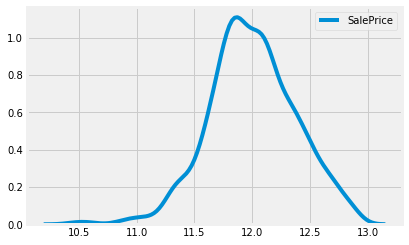

In [29]:
sns.kdeplot(data['SalePrice'])

In [30]:
data[Skew_list1['Features']]=data[Skew_list1['Features']].applymap(np.log1p) 

In [31]:
skew(data['MiscVal'])

5.185592288881464

In [32]:
type(data['Alley'])

pandas.core.series.Series

Object_list=[ i for i in data.columns if np.dtype(data[i])=='O']
Object_list


In [33]:
data=pd.get_dummies(data)

Modelling

In [68]:
#split shitty data into train set and test set
from sklearn.model_selection import train_test_split

#first we prepare data sets


train_set=data[:1432]
test_set=data[1432:]
y_train=train_set['SalePrice']
X_train=data[0:1432].drop(['SalePrice'],axis=1)

y_trainV=y_train.values
X_trainV=X_train.values

data_test9=data_test.drop(['Id'],axis=1)
data_test9V=data_test9.values
data10=pd.get_dummies(data_test9)
data10V=data10.values




In [69]:
len(X_train)

1432

In [70]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #evaluate a score by cross-validation 
from sklearn.model_selection import cross_val_predict #generate cross-validated estimates for each input data point

kfold = KFold(n_splits=9, random_state=22)
#Alternative Feature selection method

from sklearn.metrics import make_scorer, accuracy_score  #scoring method
from sklearn.metrics import classification_report #get a F1-score report
import lightgbm as lgb
d_train=lgb.Dataset(X_trainV,y_trainV)   #equal no.of rows for train_X and train_y <--VERY IMPORTANT
params={}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['sub_feature'] = 0.5
params['num_leaves'] = 300
params['min_data'] = 50
params['max_depth'] = 3
params['application']='regression_l2'
clf = lgb.train(params,d_train,100)




In [71]:
y_pred=clf.predict(data10V)

In [72]:
y_pred

array([ 11.38264449,  11.44941405,  11.43659163, ...,  11.28471749,
        11.41319031,  11.57156048])

In [39]:
pred_df = pd.DataFrame(y_pred, index=data_test["Id"], columns=["SalePrice"])
pred_df.to_csv('output.csv', header=True, index_label='Id')

In [40]:
pred_df

,SalePrice
Id,
1461,0.0
1462,0.0
1463,0.0
1464,0.0
1465,0.0
1466,0.0
1467,0.0
1468,0.0
1469,0.0


In [73]:
y_pred1=np.expm1(y_pred)

In [74]:
y_pred1

array([  87783.87390269,   93845.34029395,   92649.68544546, ...,
         79594.86998649,   90506.70926641,  106037.81430272])

In [78]:
pred_df1 = pd.DataFrame(y_pred1, index=data_test["Id"], columns=["SalePrice"])
pred_df1.to_csv('output1.csv', header=True, index_label='Id')

In [77]:
pred_df1

,SalePrice
Id,
1461,87783.873903
1462,93845.340294
1463,92649.685445
1464,102178.793907
1465,87783.873903
1466,98347.155925
1467,90506.709266
1468,98347.155925
1469,87783.873903
